In [15]:
import pandas as pd


df = pd.read_csv("delivery_time.csv")

print(df.info())  
print(df.describe()) 
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000
   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


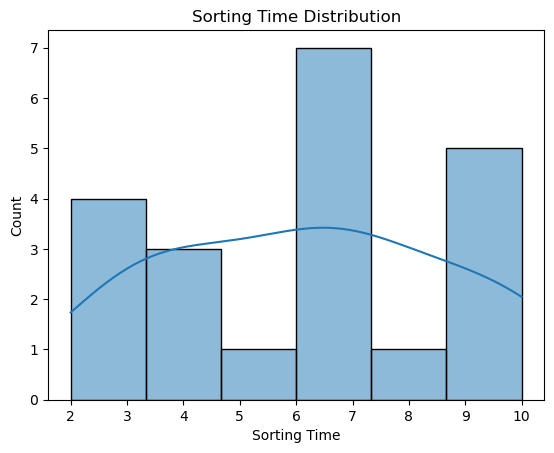

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


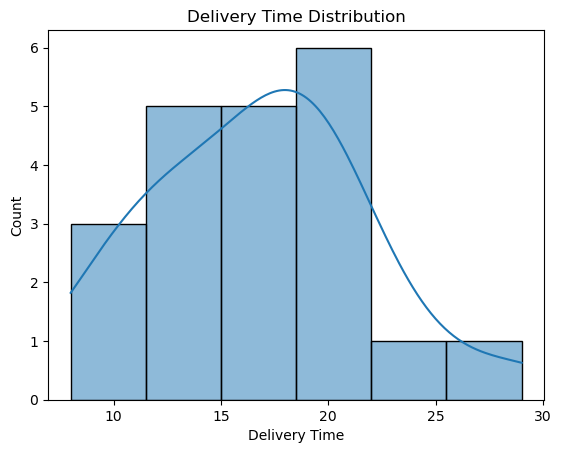

In [17]:
#Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
sns.histplot(df["Sorting Time"], kde=True)
plt.title("Sorting Time Distribution")
plt.show()

sns.histplot(df["Delivery Time"], kde=True)
plt.title("Delivery Time Distribution")
plt.show()


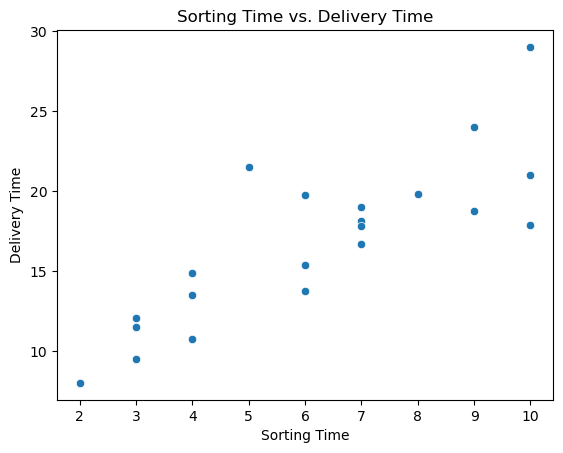

In [18]:
sns.scatterplot(x=df["Sorting Time"], y=df["Delivery Time"])
plt.title("Sorting Time vs. Delivery Time")
plt.show()


               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


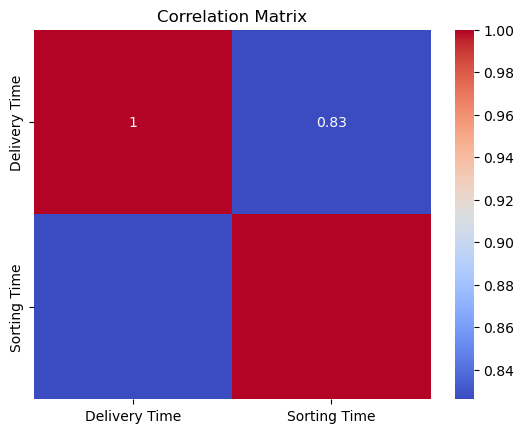

In [19]:
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [20]:
#Model Building
#Simple Linear Regression:
#Train the Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df[["Sorting Time"]]
y = df["Delivery Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")


Intercept: 4.682297962052008
Slope: 2.024244553759662


In [23]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 2.90
MSE: 14.05
R2 Score: -1.02


In [29]:
# R2 is negative means it is poor model performance so  Applying Data Transformations
 
import numpy as np

df["Log Sorting Time"] = np.log(df["Sorting Time"])
df["Log Delivery Time"] = np.log(df["Delivery Time"])


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = df[["Log Sorting Time"]]
y = df["Log Delivery Time"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² after transformation: {r2:.4f}")


R² after transformation: 0.0090


In [32]:
print(df.corr()) 


                    Delivery Time  Sorting Time  Log Sorting Time  \
Delivery Time            1.000000      0.825997          0.833933   
Sorting Time             0.825997      1.000000          0.977447   
Log Sorting Time         0.833933      0.977447          1.000000   
Log Delivery Time        0.981502      0.843177          0.878727   
Sqrt Sorting Time        0.834150      0.994704          0.993904   
Sqrt Delivery Time       0.995301      0.839077          0.860662   

                    Log Delivery Time  Sqrt Sorting Time  Sqrt Delivery Time  
Delivery Time                0.981502           0.834150            0.995301  
Sorting Time                 0.843177           0.994704            0.839077  
Log Sorting Time             0.878727           0.993904            0.860662  
Log Delivery Time            1.000000           0.864774            0.995391  
Sqrt Sorting Time            0.864774           1.000000            0.853933  
Sqrt Delivery Time           0.995391     

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[["Sorting Time"]]
y = df["Delivery Time"]

# Apply Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

y_pred_poly = poly_model.predict(X)
r2_poly = r2_score(y, y_pred_poly)

print(f"Polynomial Regression R²: {r2_poly:.4f}")


Polynomial Regression R²: 0.6934


In [ ]:
# #Business Impact
# Now that we have our best model, let’s explain how this impacts the business.
# Insights from the Model
#sorting Time has a non-linear relationship with Delivery Time.
# ️Polynomial Regression (or the best model) can predict Delivery Time with ~69% accuracy.
# This helps logistics companies optimize sorting processes to reduce delays.

#Business Benefits

# Faster Delivery: Predicting delivery times helps optimize resources.
# Better Customer Experience: Reduced delays increase customer satisfaction.
# Cost Reduction: Businesses can adjust logistics to avoid unnecessary delays.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


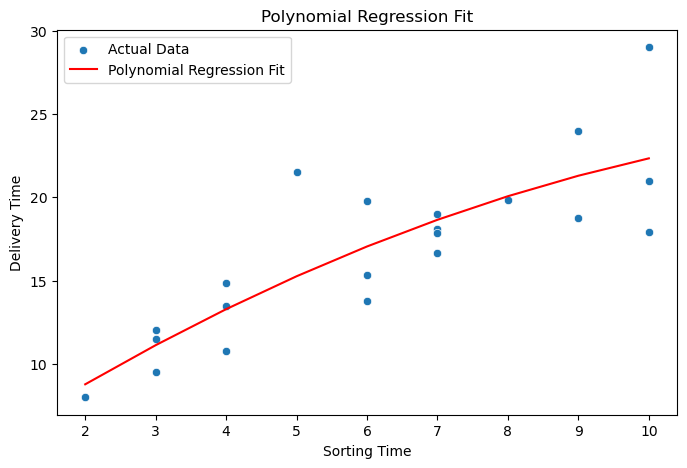

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sorted_indices = np.argsort(df["Sorting Time"].values)
X_sorted = df["Sorting Time"].values[sorted_indices]
y_pred_poly_sorted = poly_model.predict(df[["Sorting Time"]].values[sorted_indices])


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sorting Time"], y=df["Delivery Time"], label="Actual Data")


plt.plot(X_sorted, y_pred_poly_sorted, color='red', label="Polynomial Regression Fit")

plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/polynomial_regression_fit.png'

<Figure size 640x480 with 0 Axes>